In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("Data/train.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
test = pd.read_csv("Data/test.csv", parse_dates=["pickup_datetime"])

In [4]:
display(train, test)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [7]:
pd.options.display.float_format = '{:.5f}'.format

In [8]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


In [9]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000
mean,1.53488,1.66177,-73.97361,40.75093,-73.97346,40.75182
std,0.49878,1.31129,0.07339,0.02985,0.07256,0.03582
min,1.00000,0.00000,-121.93313,37.38959,-121.93333,36.60132
25%,1.00000,1.00000,-73.99185,40.73739,-73.99132,40.73600
50%,2.00000,1.00000,-73.98174,40.75409,-73.97977,40.75454
75%,2.00000,2.00000,-73.96740,40.76839,-73.96301,40.76985
max,2.00000,9.00000,-69.24892,42.81494,-67.49680,48.85760


<AxesSubplot: >

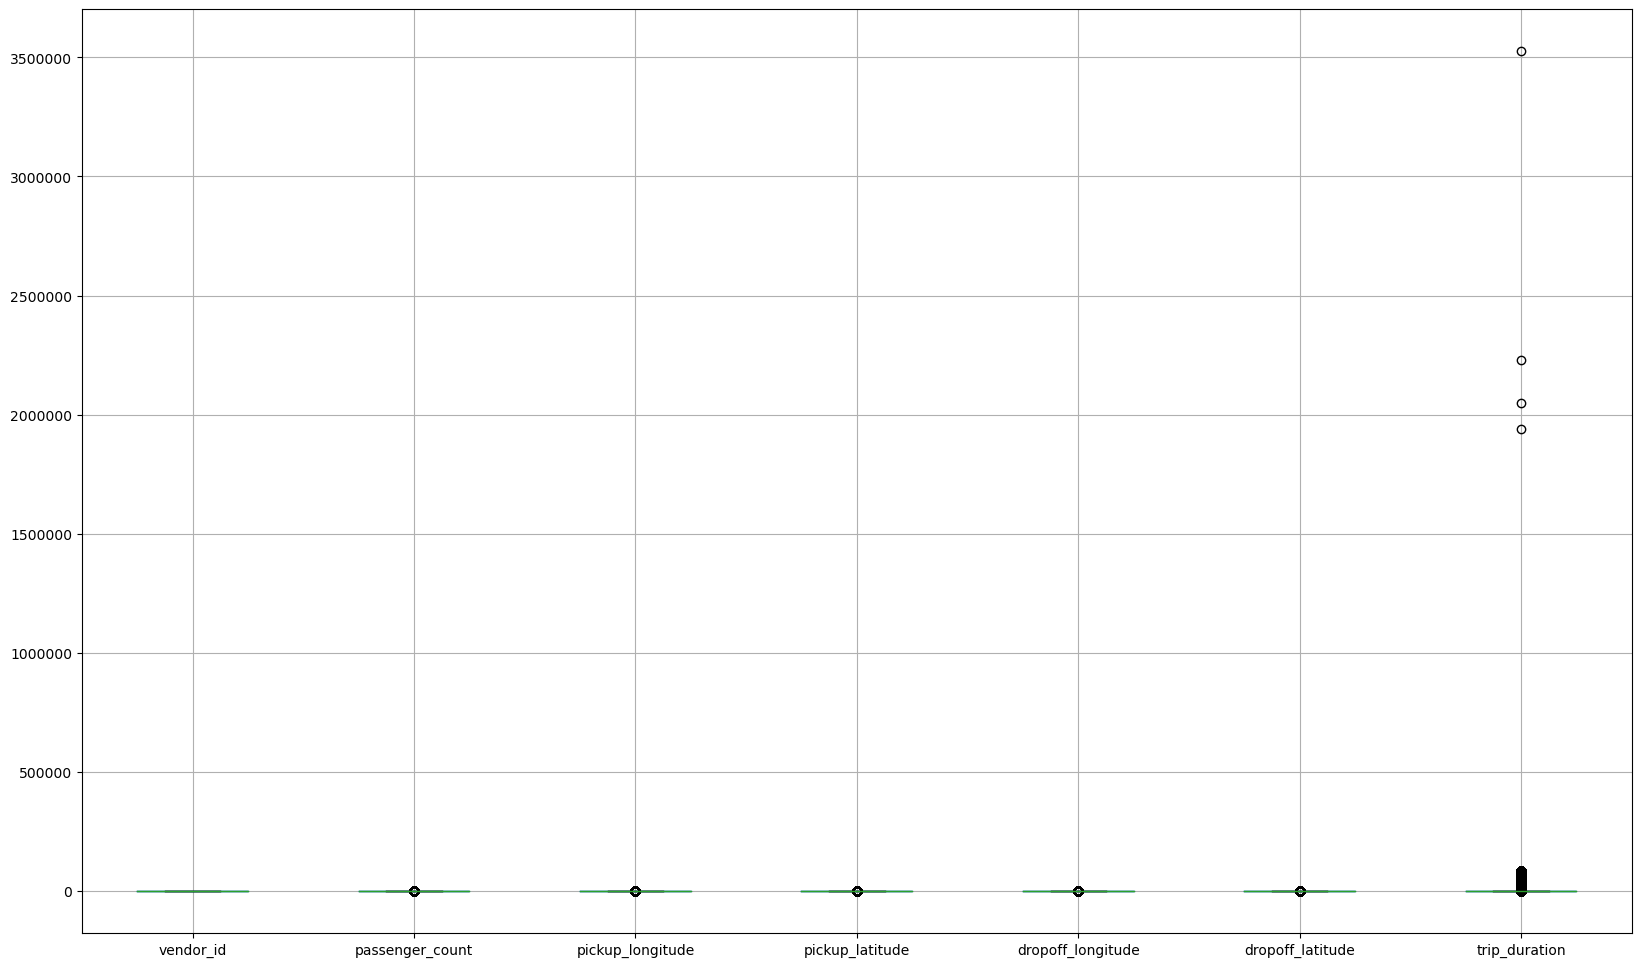

In [10]:
plt.figure(figsize=(20,12)) # size 조절
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
train.boxplot() # boxplot : data가 숫자일 때 좋음, data 분포를 파악하기 위해 사용

<AxesSubplot: >

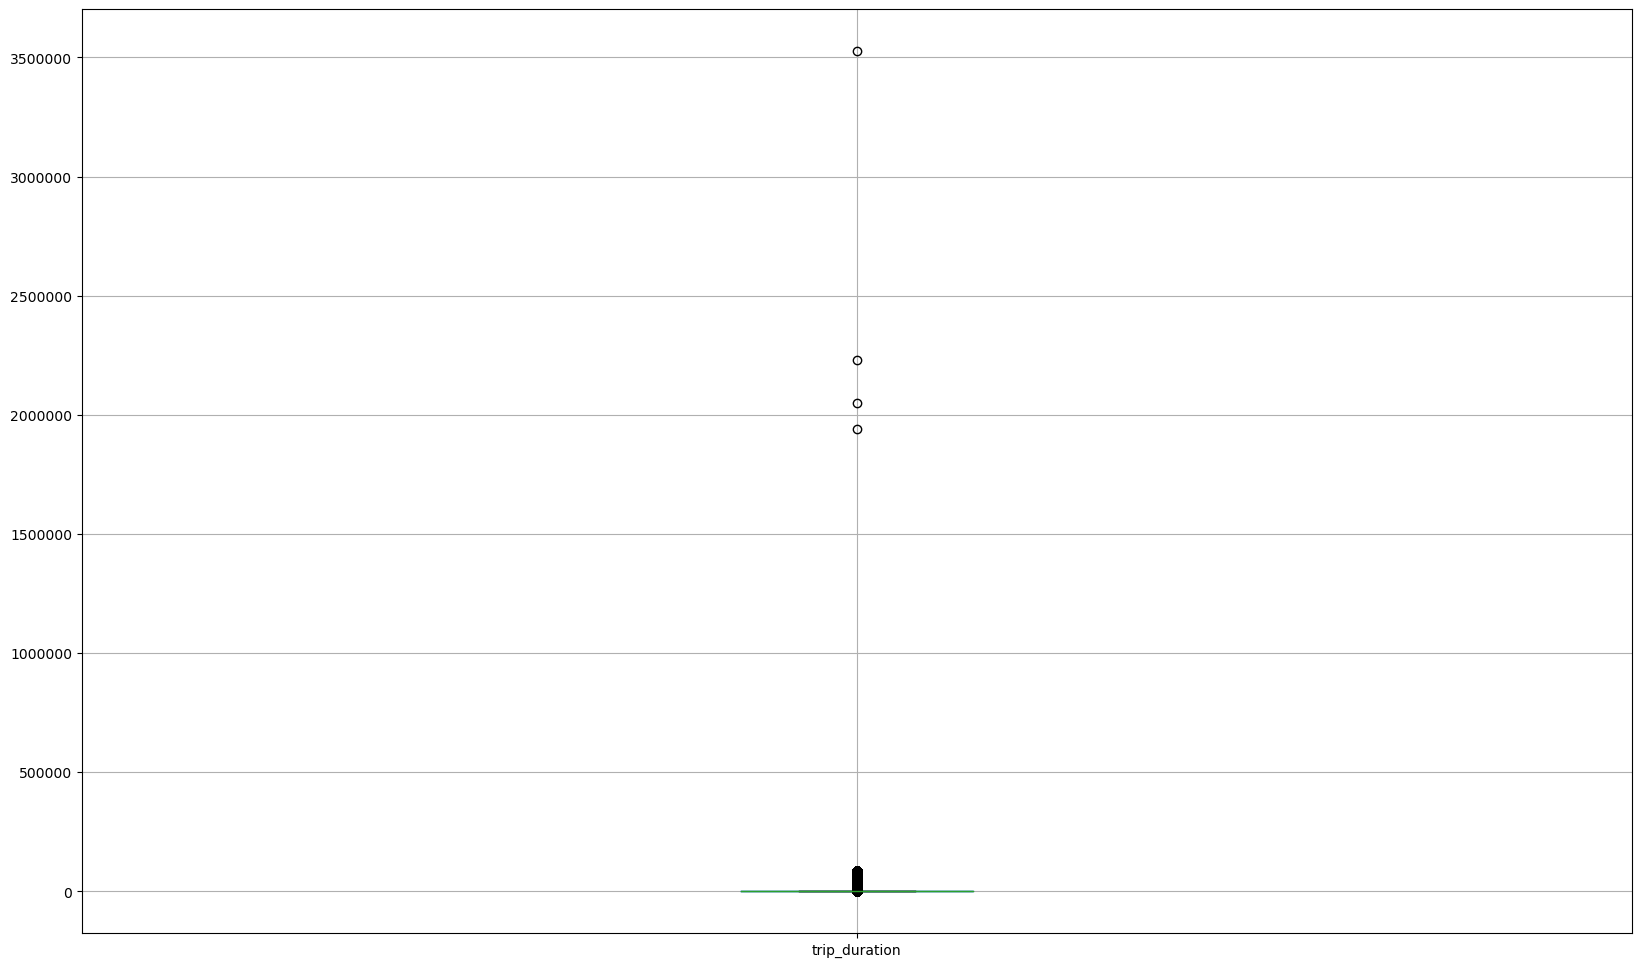

In [11]:
plt.figure(figsize=(20,12)) # size 조절
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
train.boxplot(column="trip_duration", return_type = 'axes')

In [12]:
train = train[(train.trip_duration < 1500000)]

<AxesSubplot: >

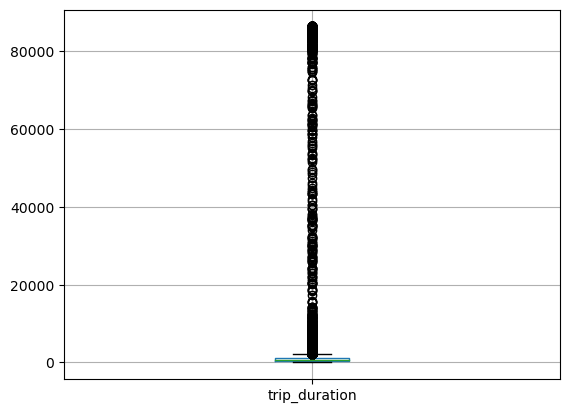

In [13]:
train.boxplot(column="trip_duration", return_type = 'axes')

<AxesSubplot: >

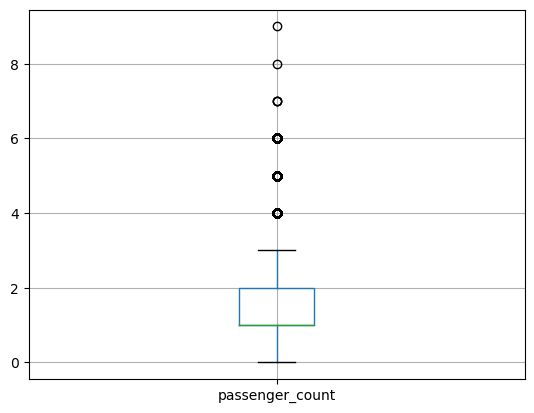

In [14]:
train.boxplot(column="passenger_count", return_type = 'axes')

In [15]:
train = train[(train.passenger_count > 0)]

<AxesSubplot: >

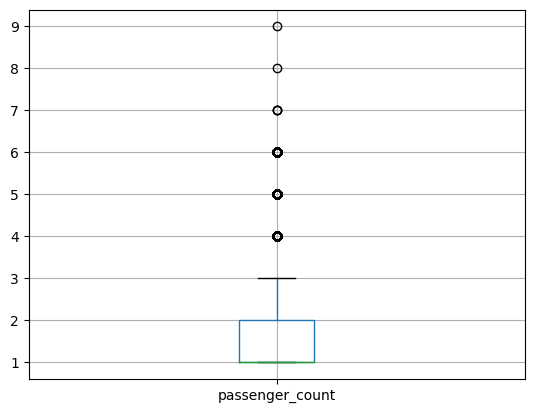

In [16]:
train.boxplot(column="passenger_count", return_type = 'axes')

In [17]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000
mean,1.53495,1.66460,-73.97349,40.75092,-73.97342,40.75180,952.78376
std,0.49878,1.31423,0.07090,0.03288,0.07064,0.03589,3170.60179
min,1.00000,1.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73589,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96302,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,86392.00000


In [18]:
train = train[(train.pickup_longitude > -120)]
train = train[(train.dropoff_longitude > -120)]

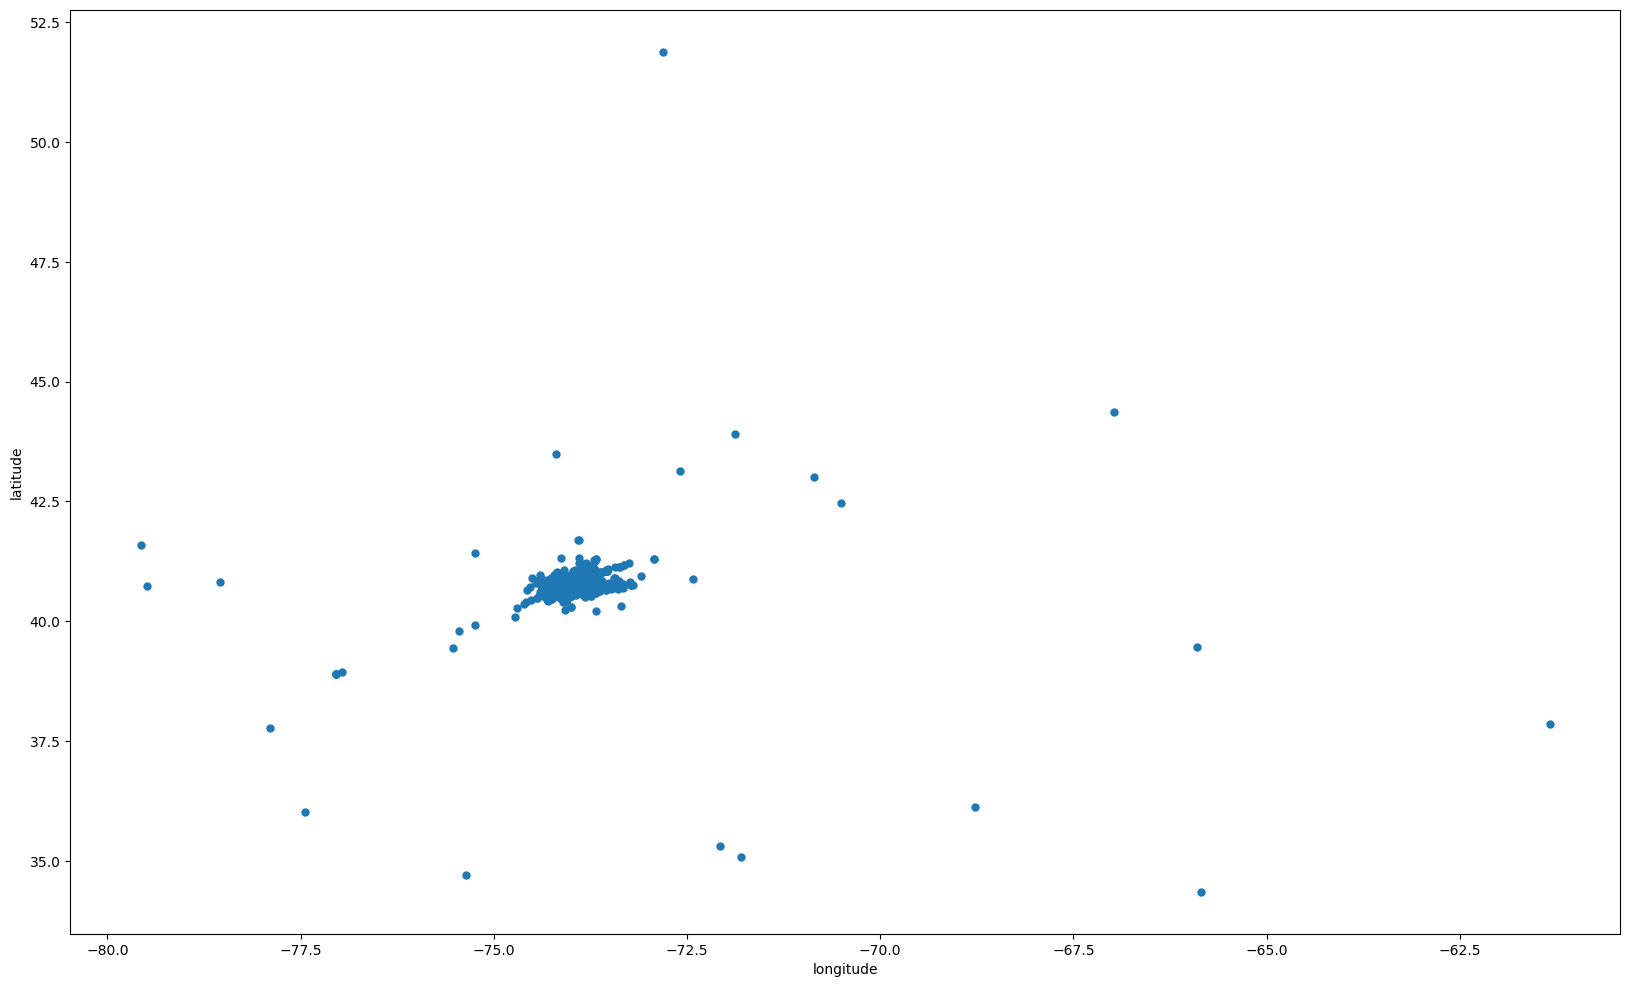

In [19]:
pickup_ln = list(train.pickup_longitude)
pickup_la = list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

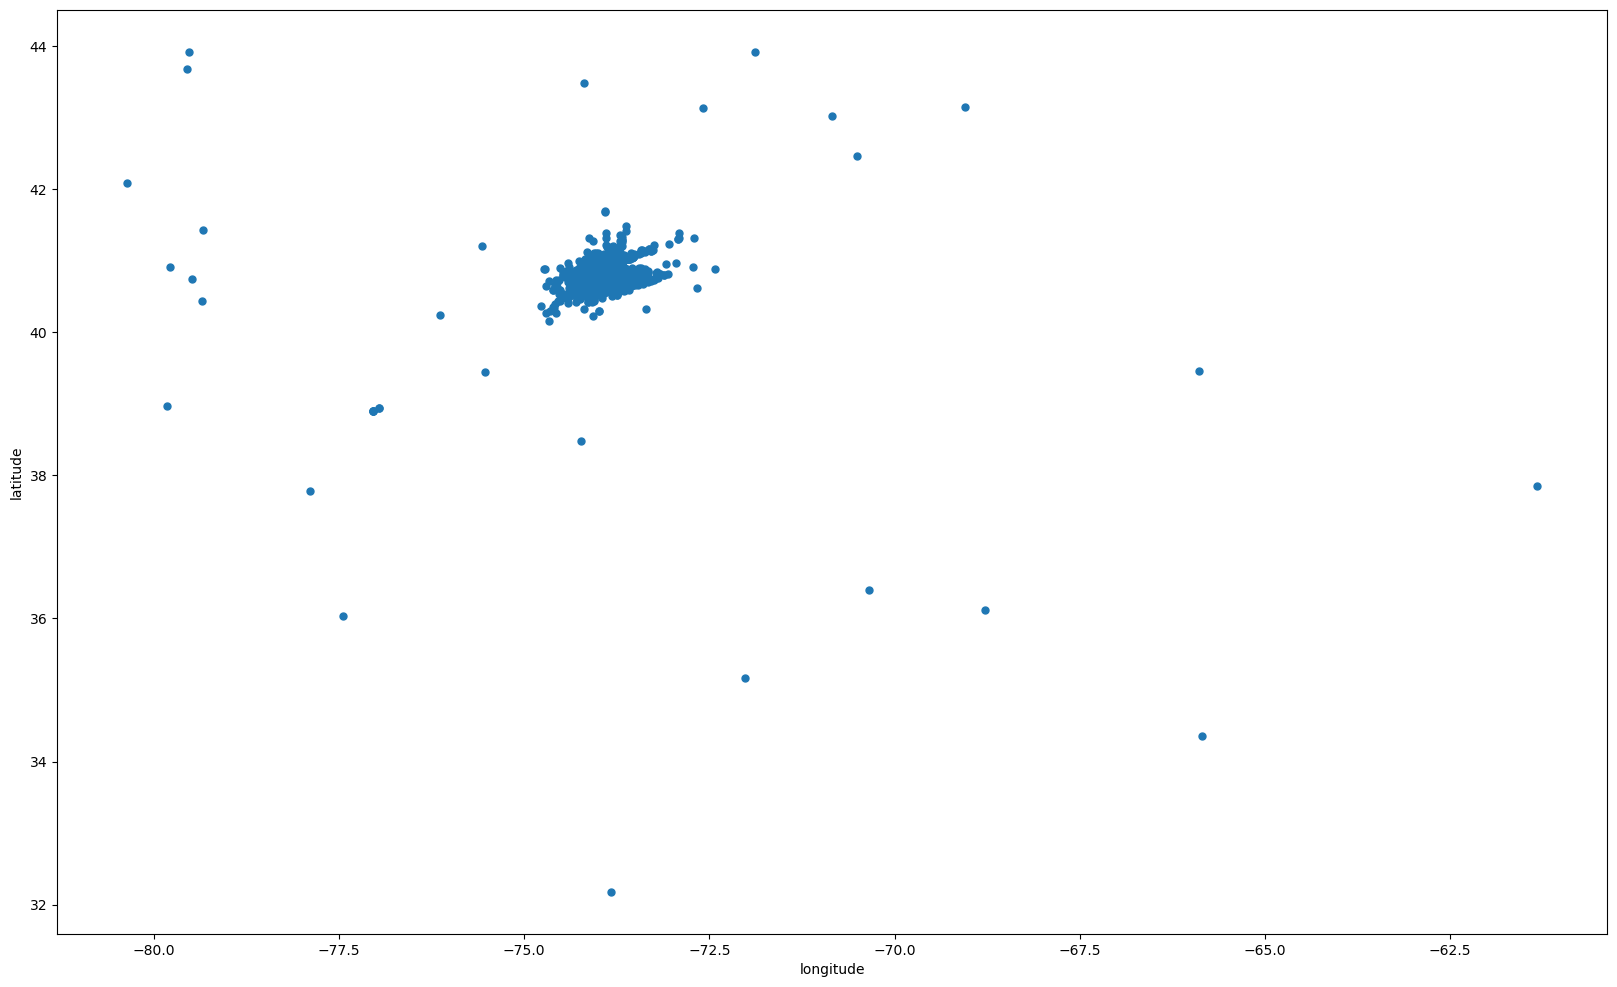

In [20]:
dropoff_ln = list(train.dropoff_longitude)
dropoff_la = list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

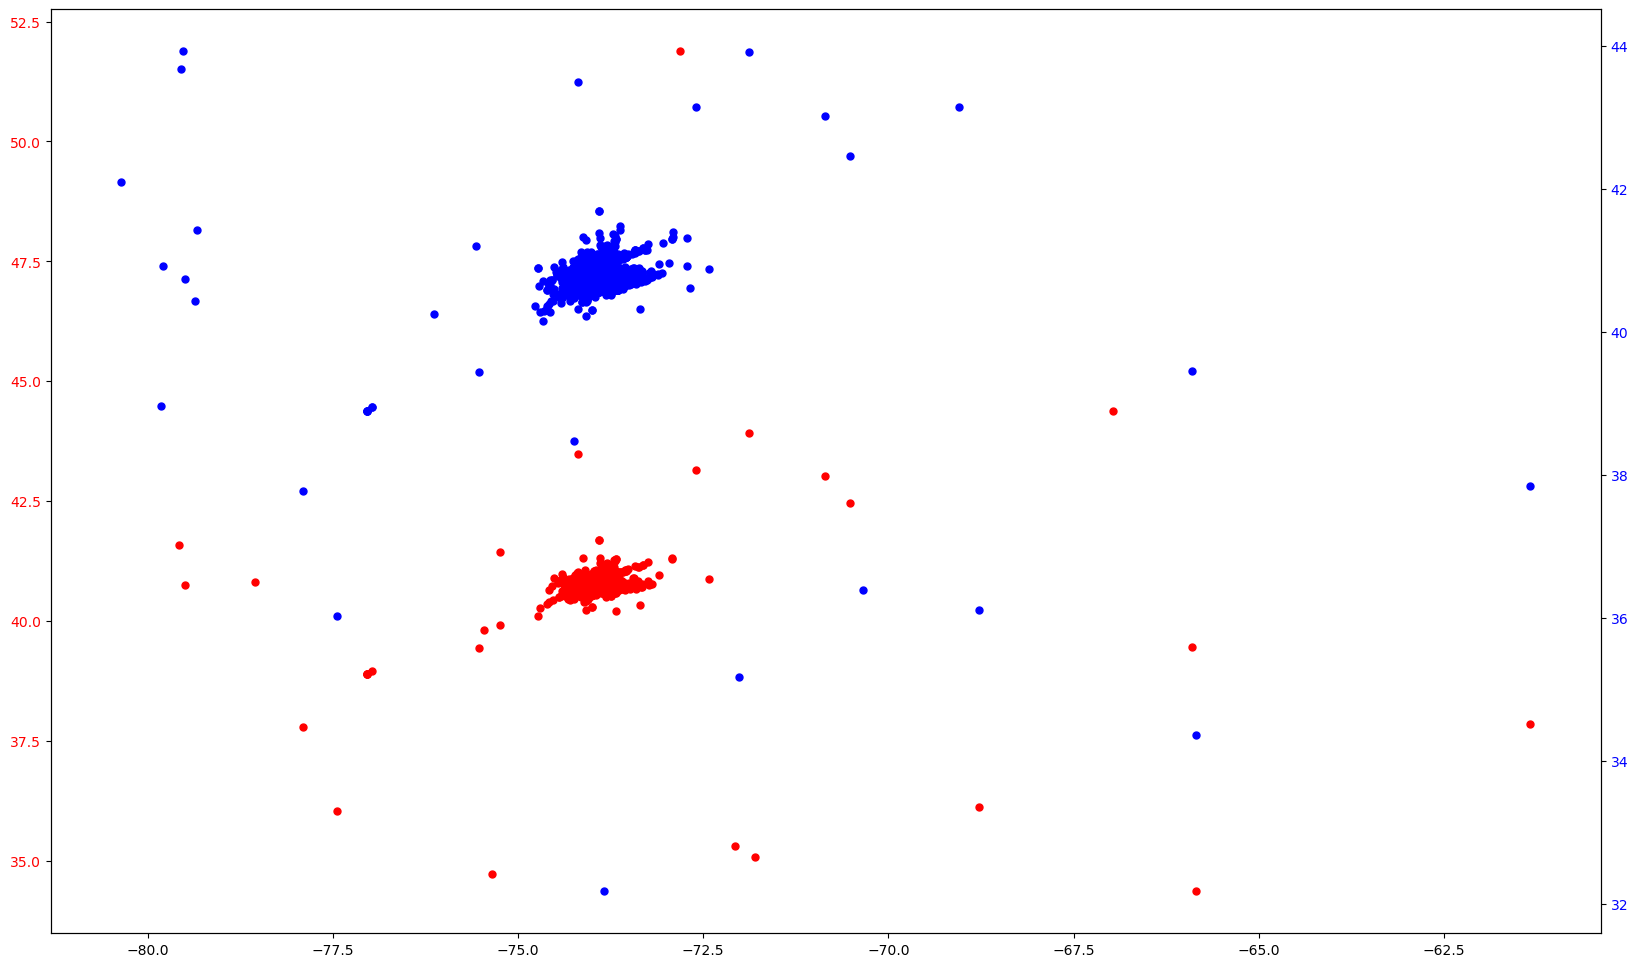

In [21]:
plt.figure(figsize=(20,12))

# pickup
ax1 = plt.subplot()
ax1.plot(pickup_ln, pickup_la, '.', color="red", alpha = 1, markersize = 10)
ax1.tick_params(axis='y', labelcolor="red")

#dropoff
ax2 = plt.twinx()
ax2.plot(dropoff_ln, dropoff_la, '.', color="blue", alpha = 1, markersize = 10)
ax2.tick_params(axis='y', labelcolor="blue")

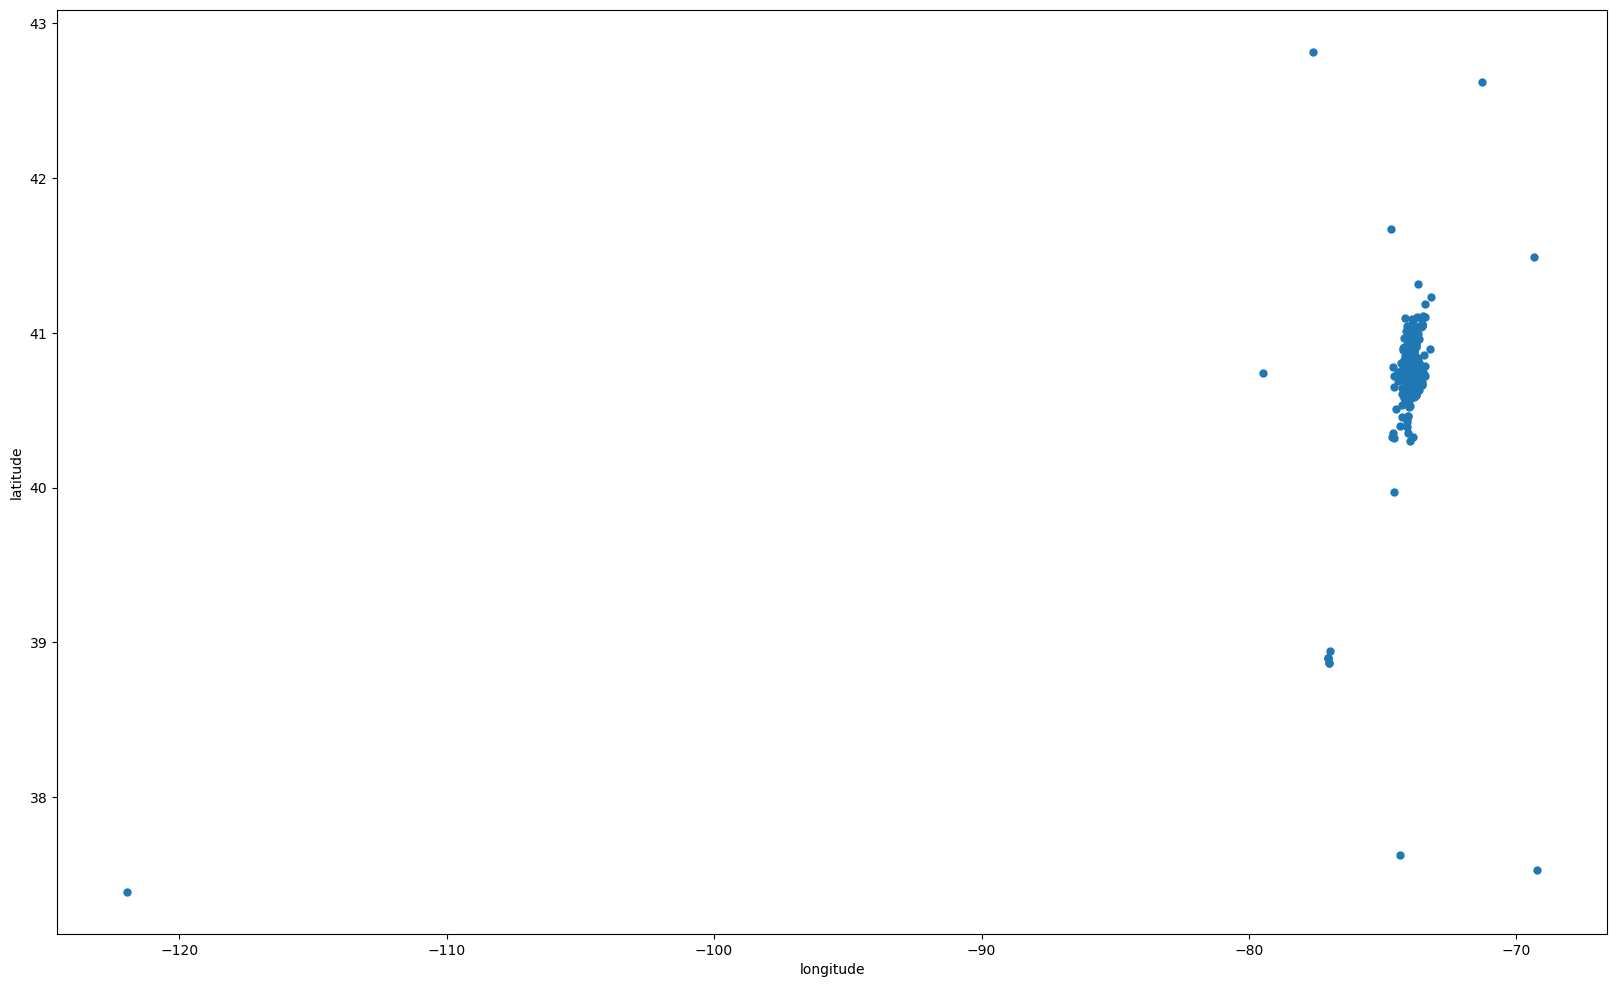

In [22]:
test_ln = list(test.pickup_longitude)
test_la = list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(test_ln, test_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

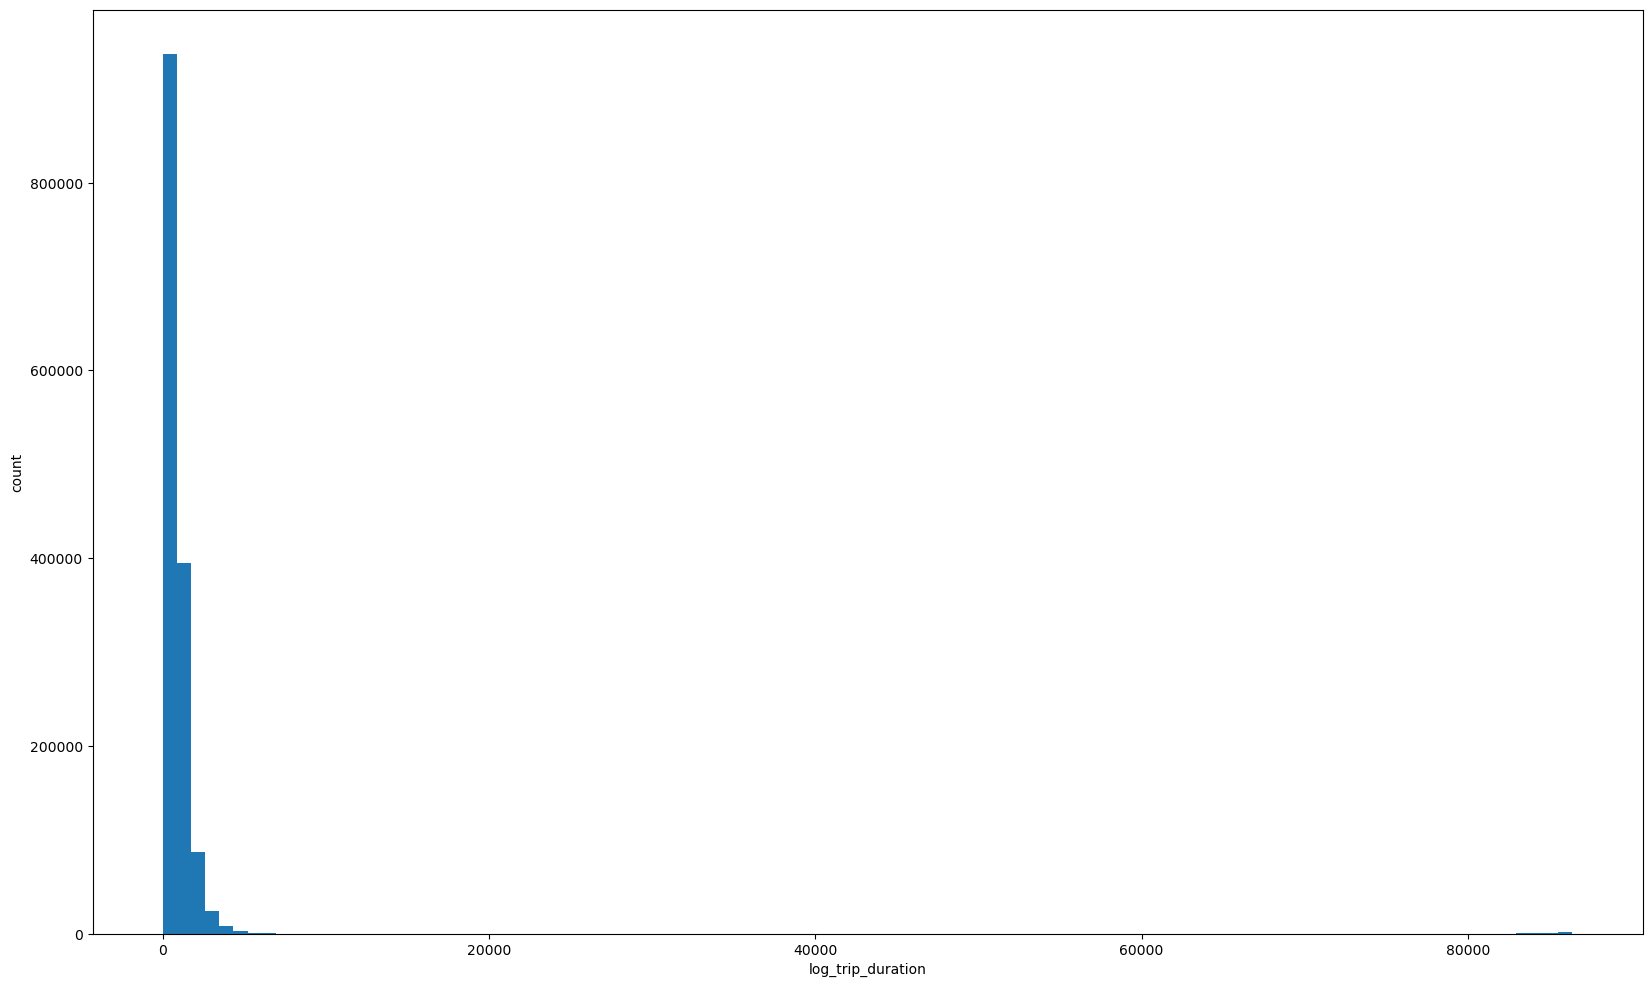

In [23]:
plt.figure(figsize=(20,12))
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

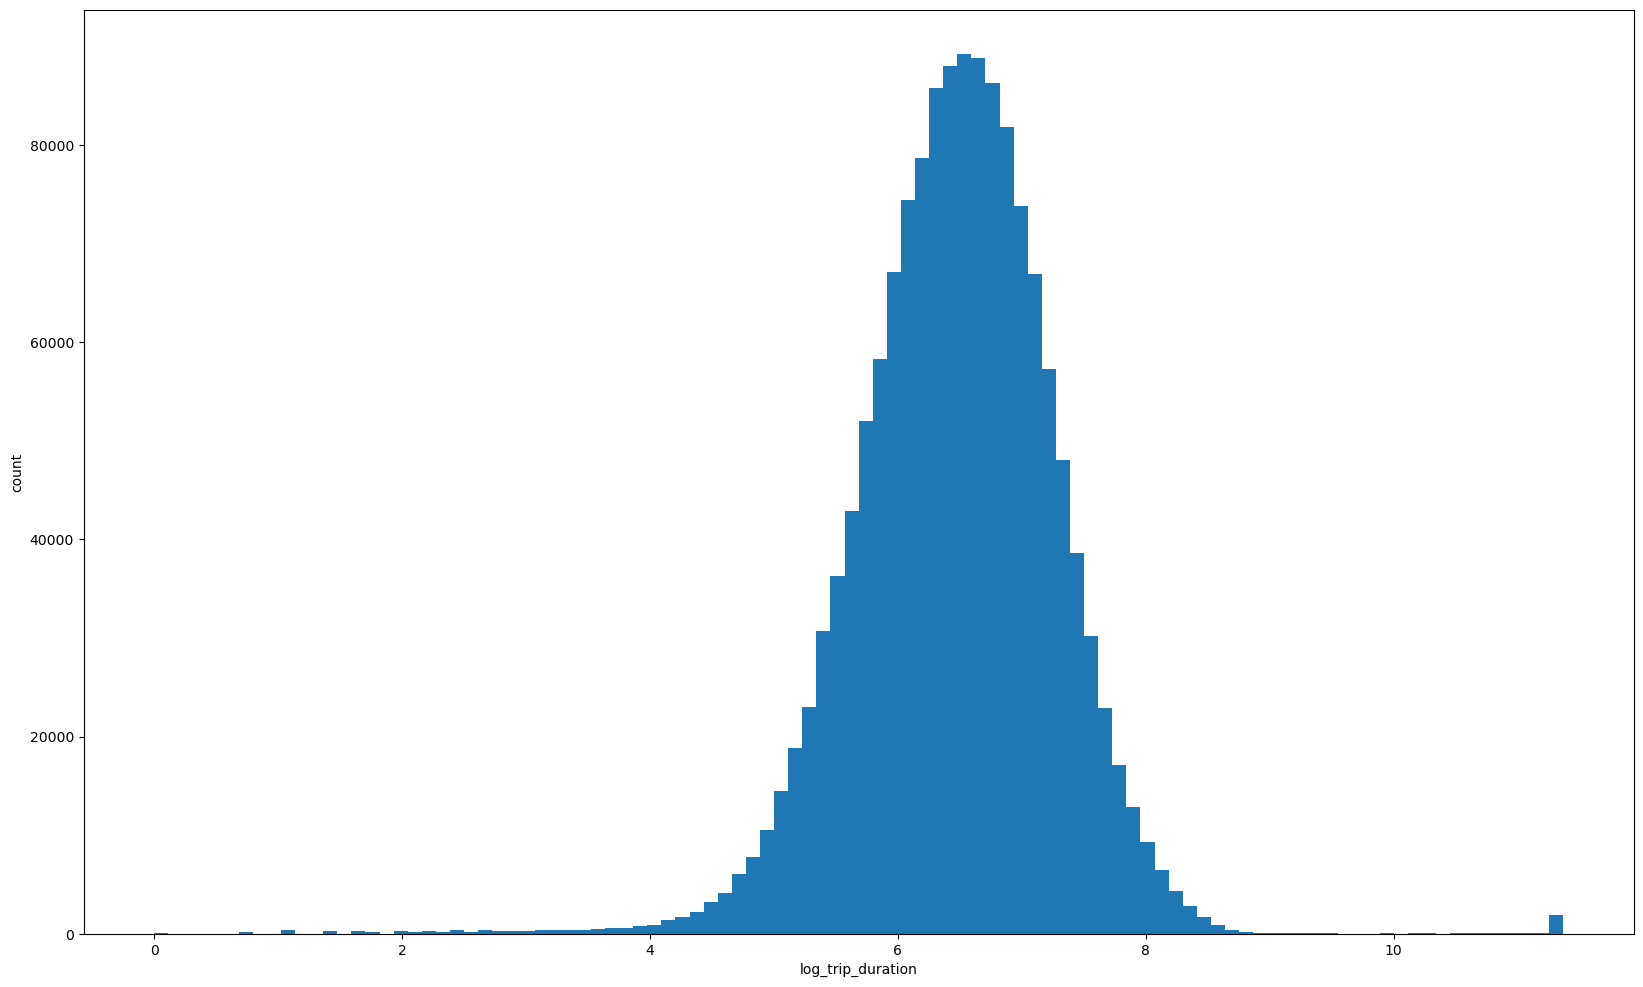

In [24]:
plt.figure(figsize=(20,12))
plt.hist(np.log(train['trip_duration'].values), bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

In [25]:
train = train[(train.trip_duration < 80000)]

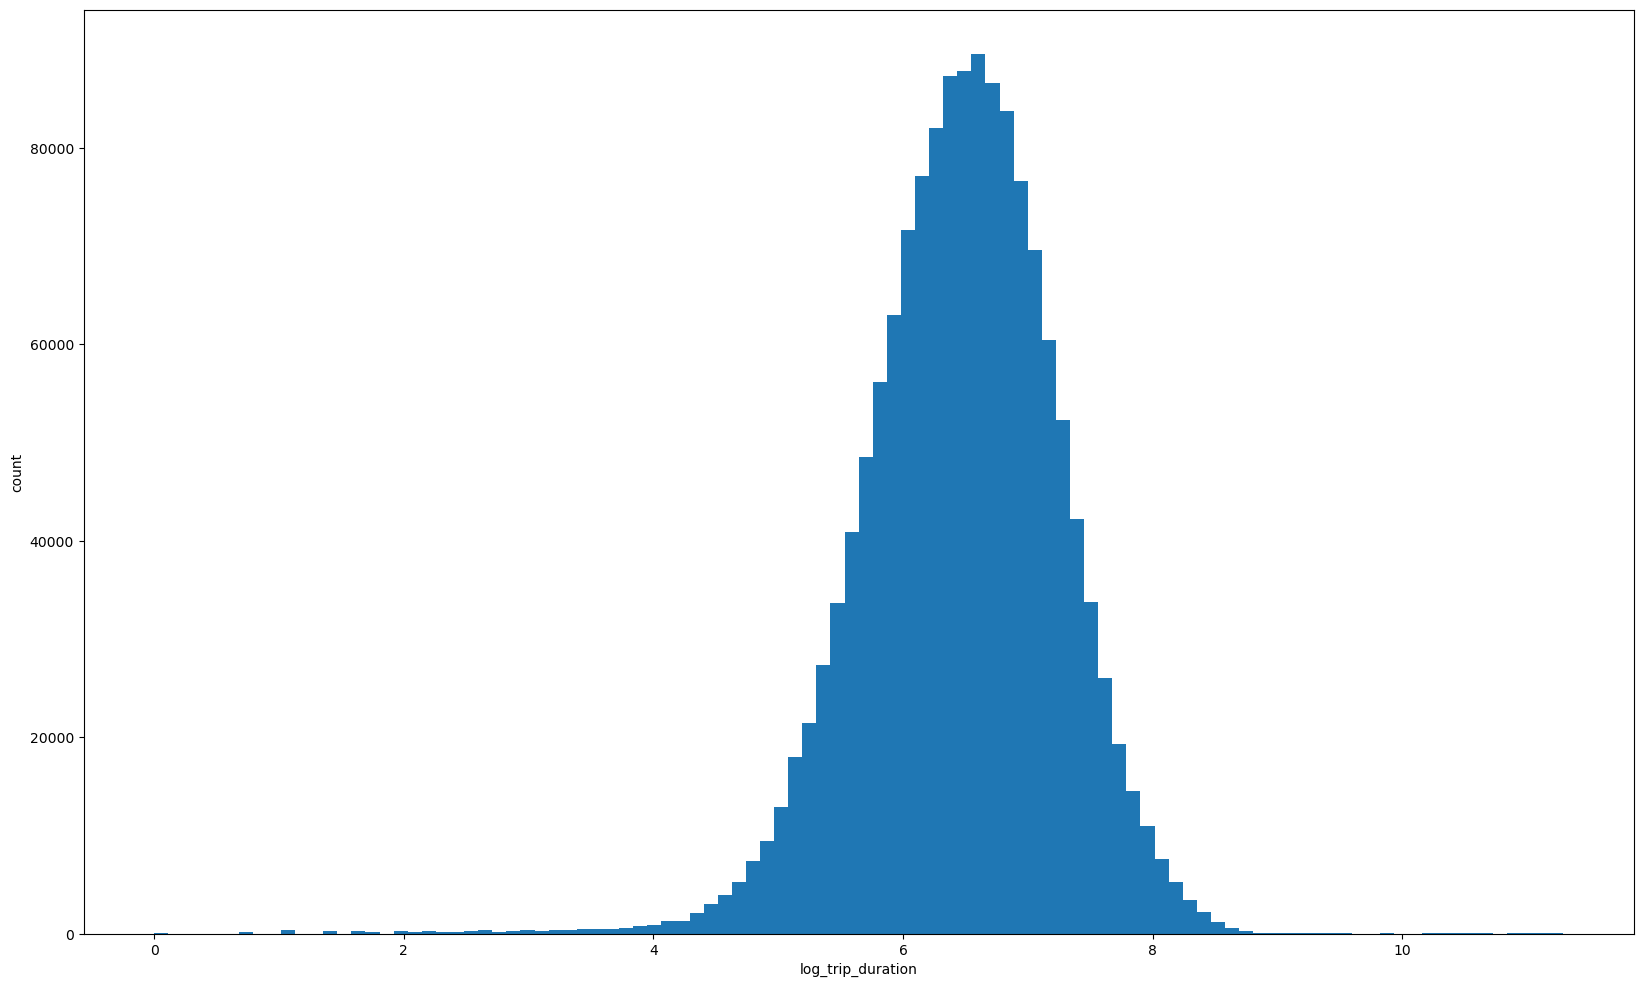

In [26]:
plt.figure(figsize=(20,12))
plt.hist(np.log(train['trip_duration'].values), bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456684 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1456684 non-null  object        
 1   vendor_id           1456684 non-null  int64         
 2   pickup_datetime     1456684 non-null  datetime64[ns]
 3   dropoff_datetime    1456684 non-null  datetime64[ns]
 4   passenger_count     1456684 non-null  int64         
 5   pickup_longitude    1456684 non-null  float64       
 6   pickup_latitude     1456684 non-null  float64       
 7   dropoff_longitude   1456684 non-null  float64       
 8   dropoff_latitude    1456684 non-null  float64       
 9   store_and_fwd_flag  1456684 non-null  object        
 10  trip_duration       1456684 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.4+ MB


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [34]:
!pip install holidays

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.5/187.5 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 25.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730971 sha256=719a44ff3a98590c1eb367a2512739697ed900ff6ee548c8709a8f2f939b96f4
  Stored in directory: /Users/nozerose/Library/Caches/pip/wheels/8a/1f/aa/ac3580dfd3e704ad8dd67759214850410f4ea01c2b87344ddd
Successfully built pymeeus


In [35]:
train["year"] = train["pickup_datetime"].dt.year
train["month"] = train["pickup_datetime"].dt.month
train["day"] = train["pickup_datetime"].dt.day
train["hour"] = train["pickup_datetime"].dt.hour
train["minute"] = train["pickup_datetime"].dt.minute
train["minute_of_day"] = train["hour"] * 60 + train["minute"]

train["weekday"] = train["pickup_datetime"].dt.weekday

train = train.drop(["minute"], axis=1)

import holidays
usa_holidays = holidays.USA()
def depend_holiday(df) :
    date = str(df['pickup_datetime'])[0:10]
    if (date in usa_holidays) : return 1
    else : return 0
    
train['holidays']= train.apply(depend_holiday, axis=1)

train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day,weekday,holidays
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,2016,3,14,17,1044,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,2016,6,12,0,43,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,2016,1,19,11,695,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,2016,4,6,19,1172,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,2016,3,26,13,810,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,N,778,2016,4,8,13,811,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,N,655,2016,1,10,7,455,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,N,764,2016,4,22,6,417,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,N,373,2016,1,5,15,956,1,0


In [37]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,day,hour,minute_of_day,weekday,holidays
count,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000,1456684.00000
mean,1.53435,1.66405,-73.97342,40.75093,-73.97335,40.75180,842.85715,2016.00000,3.51677,15.50421,13.60633,845.97122,3.04995,0.01868
std,0.49882,1.31364,0.04329,0.03265,0.04286,0.03567,870.84305,0.00000,1.68103,8.70305,6.39920,384.28828,1.95403,0.13540
min,1.00000,1.00000,-79.56973,34.35970,-80.35543,32.18114,1.00000,2016.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73589,397.00000,2016.00000,2.00000,8.00000,9.00000,573.00000,1.00000,0.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75453,662.00000,2016.00000,4.00000,15.00000,14.00000,886.00000,3.00000,0.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96302,40.76981,1073.00000,2016.00000,5.00000,23.00000,19.00000,1168.00000,5.00000,0.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,79994.00000,2016.00000,6.00000,31.00000,23.00000,1439.00000,6.00000,1.00000


In [36]:
test["year"] = test["pickup_datetime"].dt.year
test["month"] = test["pickup_datetime"].dt.month
test["day"] = test["pickup_datetime"].dt.day
test["hour"] = test["pickup_datetime"].dt.hour
test["minute"] = test["pickup_datetime"].dt.minute
test["minute_of_day"] = test["hour"] * 60 + test["minute"]

test["weekday"] = test["pickup_datetime"].dt.weekday

test['holidays']= test.apply(depend_holiday, axis=1)

test = test.drop(["minute"], axis=1)

In [38]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,year,month,day,hour,minute_of_day,weekday,holidays
count,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000
mean,1.53488,1.66177,-73.97361,40.75093,-73.97346,40.75182,2016.00000,3.52187,15.48728,13.61023,846.21256,3.04767,0.01871
std,0.49878,1.31129,0.07339,0.02985,0.07256,0.03582,0.00000,1.68005,8.70392,6.39476,383.99316,1.95395,0.13550
min,1.00000,0.00000,-121.93313,37.38959,-121.93333,36.60132,2016.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,1.00000,1.00000,-73.99185,40.73739,-73.99132,40.73600,2016.00000,2.00000,8.00000,9.00000,573.00000,1.00000,0.00000
50%,2.00000,1.00000,-73.98174,40.75409,-73.97977,40.75454,2016.00000,4.00000,15.00000,14.00000,886.00000,3.00000,0.00000
75%,2.00000,2.00000,-73.96740,40.76839,-73.96301,40.76985,2016.00000,5.00000,23.00000,19.00000,1168.00000,5.00000,0.00000
max,2.00000,9.00000,-69.24892,42.81494,-67.49680,48.85760,2016.00000,6.00000,31.00000,23.00000,1439.00000,6.00000,1.00000


In [40]:
train["store_and_fwd_flag"] = train["store_and_fwd_flag"].map({"Y" : 1, "N" : 0})
test["store_and_fwd_flag"] = test["store_and_fwd_flag"].map({"Y" : 1, "N" : 0})

In [42]:
display(train, test)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day,weekday,holidays
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,0,455,2016,3,14,17,1044,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,0,663,2016,6,12,0,43,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,0,2124,2016,1,19,11,695,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,0,429,2016,4,6,19,1172,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,0,435,2016,3,26,13,810,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,0,778,2016,4,8,13,811,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,0,655,2016,1,10,7,455,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,0,764,2016,4,22,6,417,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,0,373,2016,1,5,15,956,1,0


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,weekday,holidays
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,0,2016,6,30,23,1439,3,0
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,0,2016,6,30,23,1439,3,0
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,0,2016,6,30,23,1439,3,0
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,0,2016,6,30,23,1439,3,0
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,0,2016,6,30,23,1439,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.00346,40.72511,-74.00125,40.73364,0,2016,1,1,0,2,4,1
625130,id3700764,1,2016-01-01 00:01:52,1,-74.00636,40.74378,-73.95341,40.78247,0,2016,1,1,0,1,4,1
625131,id2568735,1,2016-01-01 00:01:24,2,-73.97227,40.75986,-73.87660,40.74866,0,2016,1,1,0,1,4,1
625132,id1384355,1,2016-01-01 00:00:28,1,-73.97650,40.73356,-73.85426,40.89179,0,2016,1,1,0,0,4,1


In [43]:
def haversine (lat1, lng1, lat2, lng2) :
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    EARTH_RADIUS = 6371 #km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    dis = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return dis

In [50]:
train['distance'] = haversine(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
test['distance'] = haversine(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])

In [46]:
def degree (lat1, lng1, lat2, lng2) :
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng2 - lng1) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng2 - lng1)
    return np.degrees(np.arctan2(y, x))

In [51]:
train['direction'] = degree(train['pickup_latitude'], train['pickup_longitude'], train['dropoff_latitude'], train['dropoff_longitude'])
test['direction'] = degree(test['pickup_latitude'], test['pickup_longitude'], test['dropoff_latitude'], test['dropoff_longitude'])

In [52]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,day,hour,minute_of_day,weekday,holidays,distance,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,0,455,2016,3,14,17,1044,0,0,1.49852,99.97020
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,0,663,2016,6,12,0,43,6,0,1.80551,-117.15377
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,0,2124,2016,1,19,11,695,1,0,6.38510,-159.68017
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,0,429,2016,4,6,19,1172,2,0,1.48550,-172.73770
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,0,435,2016,3,26,13,810,5,0,1.18859,179.47358


<AxesSubplot: >

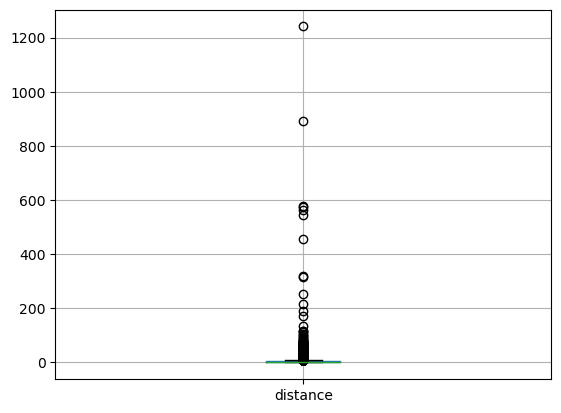

In [55]:
train.boxplot(column = 'distance')

In [57]:
train = train[train['distance'] < 400]

<AxesSubplot: >

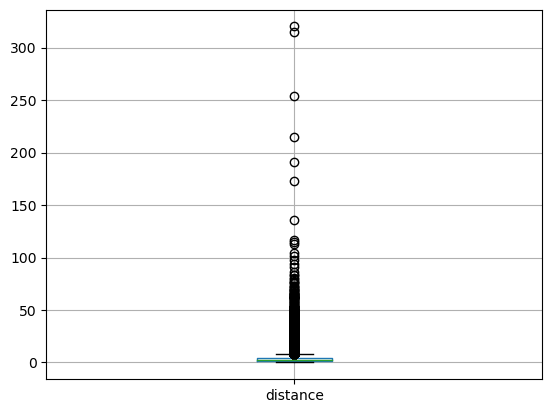

In [58]:
train.boxplot(column = 'distance')

In [59]:
x_train = train.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis = 1)
x_test = test.drop(['id', 'pickup_datetime'], axis = 1)

In [64]:
y_train = np.log(train['trip_duration'])

In [60]:
corr_train = train.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis = 1)

<AxesSubplot: >

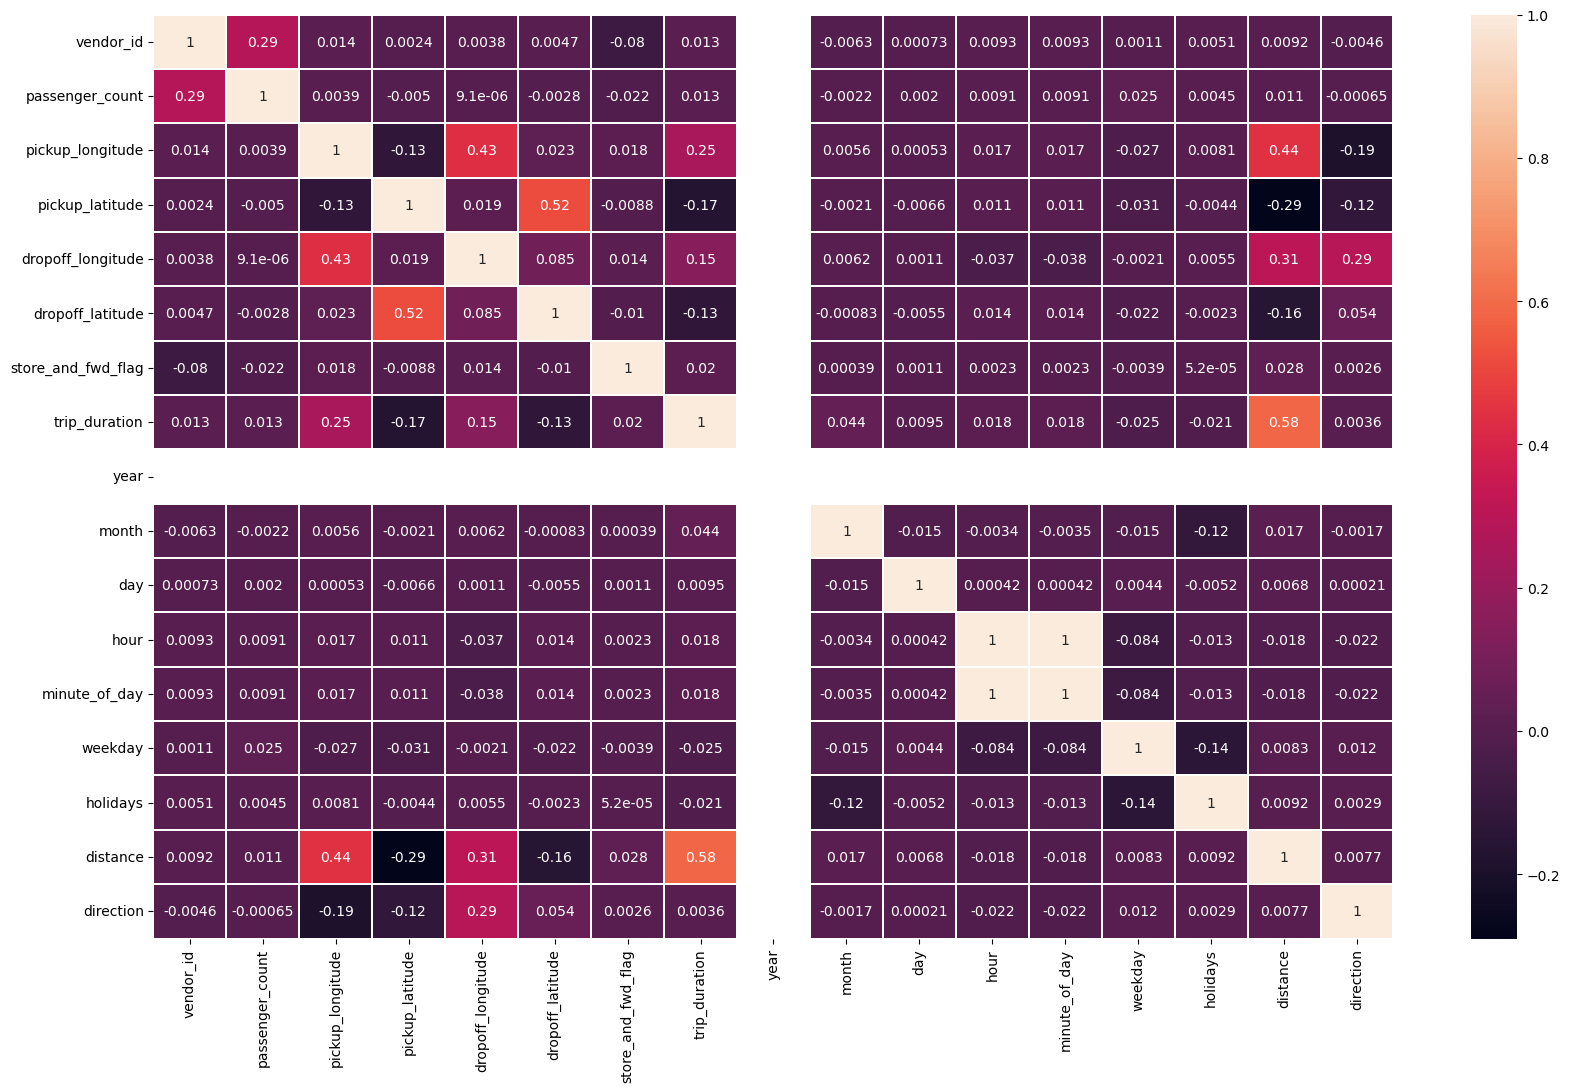

In [63]:
plt.figure(figsize = (20, 12))
sns.heatmap(corr_train.corr(), annot = True, linewidths = 0.1)

In [65]:
display(x_train, x_test)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,weekday,holidays,distance,direction
0,2,1,-73.98215,40.76794,-73.96463,40.76560,0,2016,3,14,17,1044,0,0,1.49852,99.97020
1,1,1,-73.98042,40.73856,-73.99948,40.73115,0,2016,6,12,0,43,6,0,1.80551,-117.15377
2,2,1,-73.97903,40.76394,-74.00533,40.71009,0,2016,1,19,11,695,1,0,6.38510,-159.68017
3,2,1,-74.01004,40.71997,-74.01227,40.70672,0,2016,4,6,19,1172,2,0,1.48550,-172.73770
4,2,1,-73.97305,40.79321,-73.97292,40.78252,0,2016,3,26,13,810,5,0,1.18859,179.47358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.98220,40.74552,-73.99491,40.74017,0,2016,4,8,13,811,4,0,1.22508,-119.05934
1458640,1,1,-74.00095,40.74738,-73.97018,40.79655,0,2016,1,10,7,455,6,0,6.04984,25.34220
1458641,2,1,-73.95913,40.76880,-74.00443,40.70737,0,2016,4,22,6,417,4,0,7.82461,-150.78849
1458642,1,1,-73.98208,40.74906,-73.97463,40.75711,0,2016,1,5,15,956,1,0,1.09256,35.03329


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year,month,day,hour,minute_of_day,weekday,holidays,distance,direction
0,1,1,-73.98813,40.73203,-73.99017,40.75668,0,2016,6,30,23,1439,3,0,2.74643,-3.59522
1,1,1,-73.96420,40.67999,-73.95981,40.65540,0,2016,6,30,23,1439,3,0,2.75924,172.27883
2,1,1,-73.99744,40.73758,-73.98616,40.72952,0,2016,6,30,23,1439,3,0,1.30616,133.32625
3,2,1,-73.95607,40.77190,-73.98643,40.73047,0,2016,6,30,23,1439,3,0,5.26909,-150.95683
4,1,1,-73.97021,40.76147,-73.96151,40.75589,0,2016,6,30,23,1439,3,0,0.96084,130.26038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,1,-74.00346,40.72511,-74.00125,40.73364,0,2016,1,1,0,2,4,1,0.96744,11.11027
625130,1,1,-74.00636,40.74378,-73.95341,40.78247,0,2016,1,1,0,1,4,1,6.19634,46.01848
625131,1,2,-73.97227,40.75986,-73.87660,40.74866,0,2016,1,1,0,1,4,1,8.15372,98.75437
625132,1,1,-73.97650,40.73356,-73.85426,40.89179,0,2016,1,1,0,0,4,1,20.38075,30.27524


In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, n_jobs = -1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [67]:
result = model.predict(x_test)
result

array([6.56894165, 6.46424235, 6.02725258, ..., 7.3205655 , 7.70408532,
       7.13864057])

In [68]:
sub = pd.read_csv("Data/sample_submission.csv")

In [69]:
sub

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959
...,...,...
625129,id3008929,959
625130,id3700764,959
625131,id2568735,959
625132,id1384355,959


In [70]:
sub['trip_duration'] = np.exp(result)

In [72]:
sub

,id,trip_duration
0,id3004672,712.61525
1,id3505355,641.77793
2,id1217141,414.57445
3,id2150126,1220.57050
4,id1598245,375.64844
...,...,...
625129,id3008929,279.31479
625130,id3700764,1217.13132
625131,id2568735,1511.05824
625132,id1384355,2217.38826


In [73]:
sub.to_csv("Data/sample_submission.csv", index=False)